In [3]:
%matplotlib widget

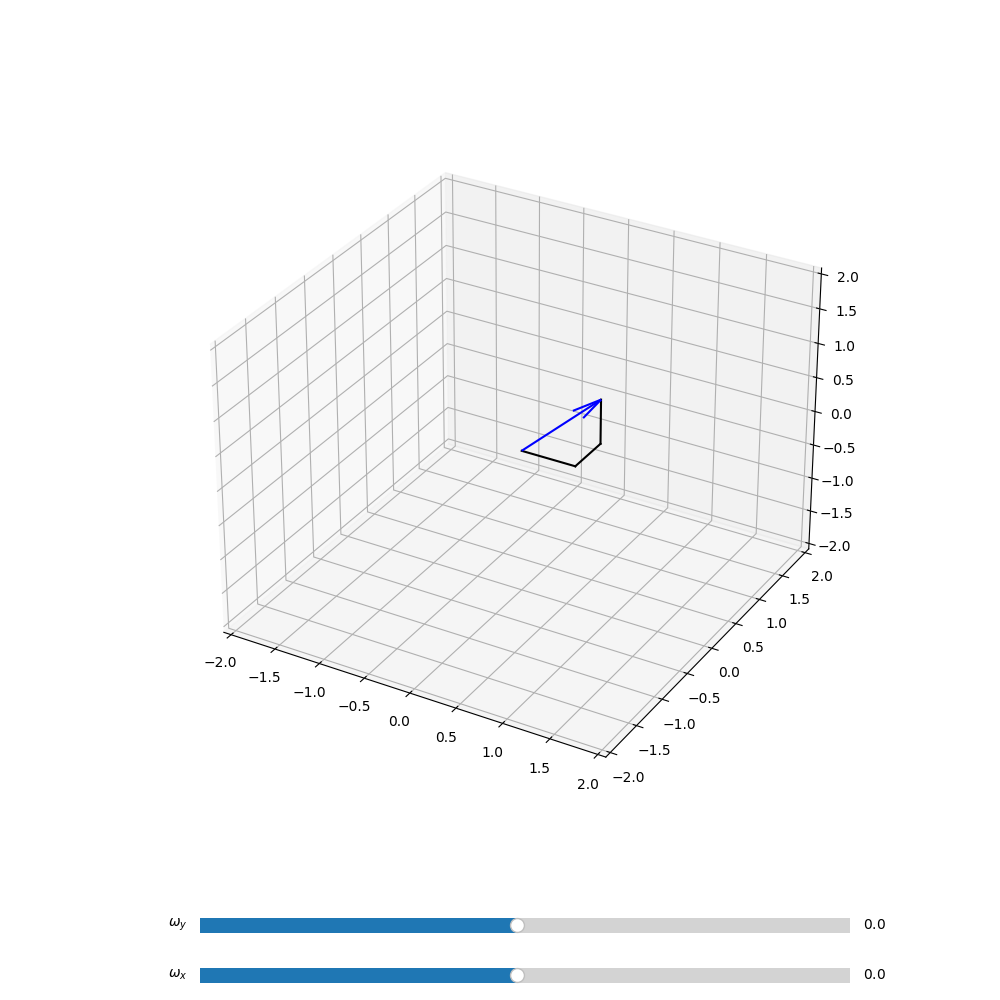

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.widgets import Slider
from mpl_toolkits.mplot3d import Axes3D

# Constants
dt = 0.1  # Time step for Euler method
vector = np.array([0.7, 0.7])  # Initial vector (arbitrary)
omega_x = 0.0  # Initial omega_x
omega_y = 0.0  # Initial omega_y

# Reduced Euler Angles 
def ode_func(vec, omega_x, omega_y):
    theta_dot = omega_x
    psi_dot = omega_y/np.cos(vec[0])
    return np.array([theta_dot, psi_dot])

# Function to transform the vector to a 3D position (e.g., by using the vector as coordinates)
def transform_vector(vec):
    theta = vec[0]
    psi = vec[1]
    x = np.cos(theta)*np.cos(psi)
    y = np.cos(theta)*np.sin(psi)
    z = np.sin(theta)
    return np.array([x, y, z])

# Stereographic Projection
# def ode_func(vec, omega_x, omega_y):
#     return 0.5*(1 + vec[0]**2 + vec[1]**2)*np.array([-omega_y, omega_x])

# # Function to transform the vector to a 3D position (e.g., by using the vector as coordinates)
# def transform_vector(vec):
#     D = 1 + vec[0]**2 + vec[1]**2
#     x = 2*vec[0]/D
#     y = 2*vec[1]/D
#     z = (1 - vec[0]**2 - vec[1]**2)/D
#     return np.array([x, y, z])

# Create the plot and 3D axes
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim([-2, 2])
ax.set_ylim([-2, 2])
ax.set_zlim([-2, 2])

# ax.xaxis.line.set_color("red")
# ax.xaxis.line.set_linewidth(2)
# ax.yaxis.line.set_color("green")
# ax.yaxis.line.set_linewidth(2)
# ax.zaxis.line.set_color("blue")
# ax.zaxis.line.set_linewidth(2)


# Create an initial quiver object
init_pos = transform_vector(vector)
quiver = ax.quiver(0, 0, 0, init_pos[0], init_pos[1], init_pos[2], length=1.0, normalize=True, color='b')
line_x, = ax.plot([0, init_pos[0]], [0, 0], [0, 0], color='black')
line_y, = ax.plot([init_pos[0], init_pos[0]], [0, init_pos[1]], [0, 0], color='black')
line_z, = ax.plot([init_pos[0], init_pos[0]], [init_pos[1], init_pos[1]], [0, init_pos[2]], color='black')

# Create sliders for omega_x and omega_y
ax_omega_x = plt.axes([0.2, 0.01, 0.65, 0.03], facecolor='lightgoldenrodyellow')
ax_omega_y = plt.axes([0.2, 0.06, 0.65, 0.03], facecolor='lightgoldenrodyellow')

slider_omega_x = Slider(ax_omega_x, r'$\omega_x$', -2.0, 2.1, valinit=omega_x, valstep=0.1)
slider_omega_y = Slider(ax_omega_y, r'$\omega_y$', -2.0, 2.1, valinit=omega_y, valstep=0.1)

fig.subplots_adjust(bottom=0.2)  
text = ax.text2D(0.4, 0.1, '', transform=fig.transFigure, fontsize=12, color='black')

# Function to update the plot
def update_plot(frame):
    global vector, omega_x, omega_y, quiver
    
    # Compute the vector derivative and update the vector using Euler method
    vector_derivative = ode_func(vector, omega_x, omega_y)
    vector += vector_derivative * dt
    
    # Get the transformed position for plotting
    position = transform_vector(vector)
    
    # Remove the old quiver and create a new one at the updated position
    quiver.remove()
    quiver = ax.quiver(0, 0, 0, position[0], position[1], position[2], color='b')

    # Update component lines (X, Y, Z)
    line_x.set_xdata([0, position[0]])  # Update x-component line
    line_x.set_ydata([0, 0])  # Keep the y-component constant
    line_x.set_3d_properties([0, 0])  # Keep z-component constant
    
    line_y.set_xdata([position[0], position[0]])  # Update y-component line
    line_y.set_ydata([0, position[1]])  # Update y-component
    line_y.set_3d_properties([0, 0])  # Keep z-component constant
    
    line_z.set_xdata([position[0], position[0]])  # Update z-component line
    line_z.set_ydata([position[1], position[1]])  # Update z-component
    line_z.set_3d_properties([0, position[2]])  # Update z-component

    text.set_text(f'$\\theta$= {np.rad2deg(vector[0]):.2f}, $\psi$ = {np.rad2deg(vector[1]):.2f}\n'
                  f'Length = {np.linalg.norm(position):.2f}')
    
    # text.set_text(f'$u$= {np.rad2deg(vector[0]):.2f}, $v$ = {np.rad2deg(vector[1]):.2f}\n'
    #               f'Length = {np.linalg.norm(position):.2f}')

    return quiver, line_x, line_y, line_z, text, 


# Update omega_x and omega_y based on slider values
def update_omega(val):
    global omega_x, omega_y
    omega_x = slider_omega_x.val
    omega_y = slider_omega_y.val

slider_omega_x.on_changed(update_omega)
slider_omega_y.on_changed(update_omega)

# Animation function
ani = FuncAnimation(fig, update_plot, frames=200, interval=dt * 1000, blit=False)

# Show the plot
plt.show()
